# Задание

dataset - данные по продажам игр в зависимости от платформы. Цель - провести препроцессинг + сделать описательную статистику данных

    Задачи:
        Препроцессинг:
       - подгрузить данные, изучить, визуализировать
       - названия столбцов к нижнему регистру
       - сделать препроцессинг данных - найти повторяющиеся, nan, пустые и тд тп
       - придумать что сделать с пропущенными данными
       - разобраться с типами данных
       - найти некорректные данные, показать их

Подсказка:
  - Поиск аномалий
        Например для оценки критиков и вывод кол-ва на экран некорректные значения можно найти так
        count_anomalic_critic = df.loc[df.loc[:, 'critic_score'] == -1]['critic_score'].count()

In [ ]:
#Здесь будем импортировать все библиотеки, которые нам нужны будут в ходе выполнения проекта
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy
import seaborn as sns
plt.style.use('bmh')

## Изученные данных из файла

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('dataset.csv',  on_bad_lines='skip' )
df = pd.read_csv('/content/drive/MyDrive/Работа/Интегра/Задача 1/dataset.csv',on_bad_lines='skip')
df.columns = df.columns.str.lower() # Нижний регистр
df.rename(columns={'rating;':'rating'}, inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E;
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,;
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E;
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E;
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,;
...,...,...,...,...,...,...,...,...,...,...,...
18013,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.00,0.01,0.00,NaN,NaN,;
18014,LMA Manager 2007,X360,2006.0,Sports,0.0,0.01,0.00,0.00,NaN,NaN,;
18015,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.00,0.01,0.00,NaN,NaN,;
18016,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,;


##### Некорректные данные в столбцах:

In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'name'
name_values = df.loc[pd.to_numeric(df['name'], errors='coerce').notna(), 'name']
print(name_values.unique())

['1942']


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'platform'
platform_values = df.loc[pd.to_numeric(df['platform'], errors='coerce').notna(), 'platform']
print(platform_values.unique())

['2600']


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'year_of_release'
year_of_release_values = df.loc[pd.to_numeric(df['year_of_release'], errors='coerce').isna(), 'year_of_release']
print(year_of_release_values.unique())

[nan 'GBA']


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'genre'
rating_values = df.loc[pd.to_numeric(df['genre'], errors='coerce').notna(), 'genre']
print(rating_values.unique())

['2001.0']


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'na_sales'
na_sales_values = df.loc[pd.to_numeric(df['na_sales'], errors='coerce').isna(), 'na_sales']
print(na_sales_values.unique())

['Adventure']


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'eu_sales'
eu_sales_values = df.loc[pd.to_numeric(df['eu_sales'], errors='coerce').isna(), 'eu_sales']
print(eu_sales_values.unique())

[]


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'jp_sales'
jp_sales_values = df.loc[pd.to_numeric(df['jp_sales'], errors='coerce').isna(), 'jp_sales']
print(jp_sales_values.unique())

[]


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'critic_score'
critic_score_values = df.loc[pd.to_numeric(df['critic_score'], errors='coerce').isna(), 'critic_score']
print(critic_score_values.unique())

[nan]


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'jp_sales'
user_score_values = df.loc[pd.to_numeric(df['user_score'], errors='coerce').isna(), 'user_score']
print(user_score_values.unique())

[nan 'tbd']


In [ ]:
# Фильтруем строки с некорректными значениями в столбце 'rating'
rating_values = df.loc[pd.to_numeric(df['rating'], errors='coerce').notna(), 'rating']
print(rating_values.unique())

[]


In [ ]:
rating_values = df.loc[pd.to_numeric(df['rating'], errors='coerce').isna(), 'rating']
print(rating_values.unique())

['E;' ';' 'M;' 'T;' 'E10+;' 'K-A;' 'AO;' 'EC;' nan 'M' 'RP;']


In [ ]:
# count_anomalic_critic = df.loc[df.loc[:, 'critic_score'] == -1]['critic_score'].count()
# count_anomalic_critic
# count_anomalic_jp_sales = df.loc[df.loc[:, 'jp_sales'] == -1]['jp_sales'].count()
# count_anomalic_jp_sales
# count_anomalic_user_score = df.loc[df.loc[:, 'user_score'] == -1]['user_score'].count()
# count_anomalic_user_score

### 1. Анализ пропусков, дублей, типов и предобработка данных


#### 1.1 Анализ типов данных

In [ ]:
#Не забудь глянуть артефакты, отриц значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18018 entries, 0 to 18017
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             18016 non-null  object 
 1   platform         18018 non-null  object 
 2   year_of_release  17751 non-null  object 
 3   genre            18016 non-null  object 
 4   na_sales         18018 non-null  object 
 5   eu_sales         18018 non-null  float64
 6   jp_sales         18018 non-null  float64
 7   other_sales      18018 non-null  float64
 8   critic_score     8181 non-null   float64
 9   user_score       10052 non-null  object 
 10  rating           17996 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.5+ MB


In [ ]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E;
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,;
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E;
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E;
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,;


In [ ]:
df[::-5].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
18017,Winning Post 8 2016,PSV,2016.0,Simulation,0.0,0.0,0.01,0.0,NaN,NaN,;
18012,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.00,0.0,NaN,NaN,;
18007,Plushees,DS,2008.0,Simulation,0.01,0.0,0.00,0.0,NaN,tbd,E;
18002,The Longest 5 Minutes,PSV,2016.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,;
17997,Carmageddon 64,N64,1999.0,Action,0.01,0.0,0.00,0.0,NaN,NaN,;


In [ ]:
# Определяем функцию, которая проверяет, является ли значение числовым
def is_numeric(x):
    try:
        float(x)
        return True
    except ValueError:
        return False
# Заменяем числовые строки на NaN в строковых столбцах:
df['name'] = df['name'].mask(df['name'].apply(is_numeric), other=pd.NA).astype(str)
df['platform'] = df['platform'].mask(df['platform'].apply(is_numeric), other=pd.NA).astype(str)
df['genre'] = df['genre'].mask(df['genre'].apply(is_numeric), other=pd.NA).astype(str)

In [ ]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').fillna(0).astype(int)
df['na_sales'] = pd.to_numeric(df['na_sales'], errors='coerce').astype(float)
df['eu_sales'] = df['eu_sales'].fillna(0).astype(float)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').astype(float)

In [ ]:
df['jp_sales'] = pd.to_numeric(df['jp_sales'], errors='coerce').astype(float)
df['other_sales'] = pd.to_numeric(df['other_sales'], errors='coerce').astype(float)
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce').astype(float)
df['rating'] = df['rating'].str.replace(';', '').replace('', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18018 entries, 0 to 18017
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             18018 non-null  object 
 1   platform         18018 non-null  object 
 2   year_of_release  18018 non-null  int64  
 3   genre            18018 non-null  object 
 4   na_sales         18017 non-null  float64
 5   eu_sales         18018 non-null  float64
 6   jp_sales         18018 non-null  float64
 7   other_sales      18018 non-null  float64
 8   critic_score     8181 non-null   float64
 9   user_score       7635 non-null   float64
 10  rating           9987 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


####        1.2 Анализ дублей.

In [ ]:
#Смотрим кол-во повторяющихся заголовков.
df.shape[0] - df['name'].nunique()

6536

In [ ]:
# Проверим в каких конкретно столбцах есть дубликаты:
df_postal = df.groupby('name', as_index=False).count().sort_values('name', ascending=False)
df_postal

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11481,¡Shin Chan Flipa en colores!,1,1,1,1,1,1,1,0,0,0
11480,wwe Smackdown vs. Raw 2006,1,1,1,1,1,1,1,0,0,0
11479,uDraw Studio: Instant Artist,2,2,2,2,2,2,2,1,1,2
11478,uDraw Studio,1,1,1,1,1,1,1,1,0,1
11477,thinkSMART: Chess for Kids,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4,Tales of Xillia 2,1,1,1,1,1,1,1,1,1,1
3,Haikyu!! Cross Team Match!,1,1,1,1,1,1,1,0,0,0
2,Frozen: Olaf's Quest,2,2,2,2,2,2,2,0,0,0
1,Fire Emblem Fates,1,1,1,1,1,1,1,0,0,0


In [ ]:
# Удалим дубликаты с помощью функции drop_duplicates:
df.drop_duplicates(subset=['name'], inplace= True)

In [ ]:
# Проверим дибликаты после удаления:
df.shape[0] - df['name'].nunique()

0

In [ ]:
df.shape

(11482, 11)

### Визуализируем данные

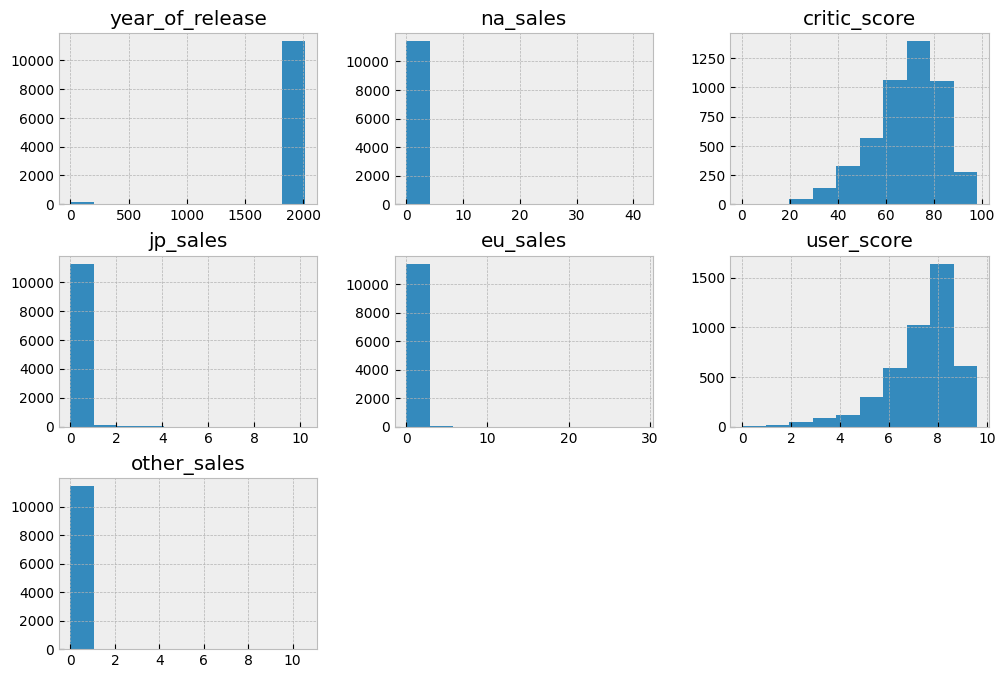

In [ ]:
features = list(set(df.columns) - set(['name', 'platform', 'genre',  'rating']))
df[features].hist(figsize=(12,8));

<Axes: xlabel='critic_score', ylabel='platform'>

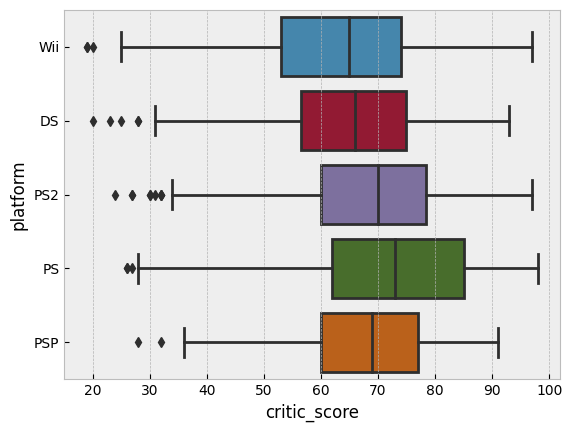

In [ ]:
top_platforms = df.platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="platform", x="critic_score", data=df[df.platform.isin(top_platforms)], orient="h")

#### 1.3 Анализ пропусков

<Axes: >

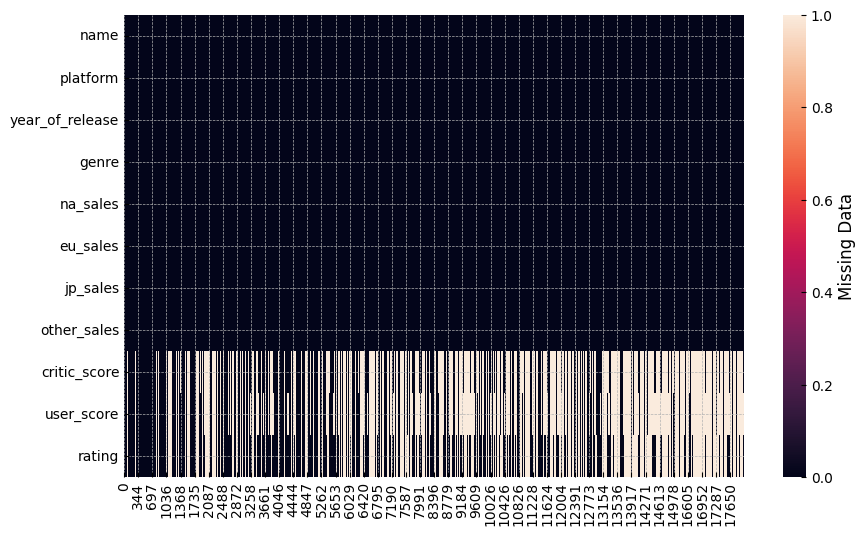

In [ ]:
#Поиск пропусков с помощью графика
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
           cbar_kws={'label':'Missing Data'})

In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              1
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6615
user_score         7037
rating             5558
dtype: int64

In [ ]:
NA_user_score = round(100*df['user_score'].isna().sum()/len(df['user_score']),2)
print(f'Данные [user_score] где есть NA в % = {NA_user_score}')

Данные [user_score] где есть NA в % = 61.29


In [ ]:
NA_critic_score = round(100*df['critic_score'].isna().sum()/len(df['critic_score']),2)
print(f'Данные [critic_score] где есть NA в % = {NA_critic_score}')

Данные [critic_score] где есть NA в % = 57.61


In [ ]:
NA_na_sales = round(100*df['na_sales'].isna().sum()/len(df['na_sales']),2)
print(f'Данные [na_sales] где есть NA в % = {NA_na_sales}')

Данные [na_sales] где есть NA в % = 0.01


In [ ]:
NA_eu_sales = round(100*df['eu_sales'].isna().sum()/len(df['eu_sales']),2)
print(f'Данные [eu_sales] где есть NA в % = {NA_eu_sales}')

Данные [eu_sales] где есть NA в % = 0.0


In [ ]:
NA_jp_sales = round(100*df['jp_sales'].isna().sum()/len(df['jp_sales']),2)
print(f'Данные [jp_sales] где есть NA в % = {NA_jp_sales}')

Данные [jp_sales] где есть NA в % = 0.0


In [ ]:
df['na_sales'].fillna(df['na_sales'].mean(), inplace=True)
df['eu_sales'].fillna(df['eu_sales'].mean(), inplace=True)
df['jp_sales'].fillna(df['jp_sales'].mean(), inplace=True)
df['year_of_release'].fillna(df['year_of_release'].mean(), inplace=True)

In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6615
user_score         7037
rating             5558
dtype: int64

In [ ]:
# neg_df = (df['user_score'] < 0 ).any()
# neg_df
# neg_df = (df['sum_sales'] < 0 ).any()
# neg_df

### Выводы

- 1) В данных имелись некорректные значения, почти в каждом из столбов, так как логи были изначально битые(по несколько запятых), соответсвенно значения съехались по коллонкам;
- 2) Коллонки critic_score и user_score имеют большое кол-во пропущенных значений, около 60% каждая... В данном случае эти коллонки не желательно использовать в полной статистики, только делая срезы, где нету пропусков;
- 3) Так, как при загрузки данные по большей своей мере были съехавшие, то практически по всем столбацам идёт тип object.

### Вывод

- В результате предобработки были удалены некорректные данные, изменены типы, Nan заменены на mean по столбцу.

## Анализ данных

    #Вся основная работа будет вестись тут
    Аналитика :
          - показать сколько игр выпускалось в разные годы. Описать и обосновать переломные моменты продаж
          - найти топ 10 платформ с наибольшими суммарными продажами
          - построить распределение по годам в зависимости от сумм продаж (выбрать наибольшие суммарные продажи)
          - сделать срез от 2009 года и посмотреть какие платформы актуальные( по кол-ву продаж)
          - выбрать акутальный период начала исследования в зависимости от новой платформы
          - После того, как опередлились с периодом, удалить все данные до начала периода
          - какие платформы лидируют по продажам?
          - составь потрет пользователя по региону EU
                  - Самые популярные платформы (топ-5). Опиши различия в долях продаж.
                  - Самые популярные жанры (топ-5). Поясните разницу


    - Суммарное распределение по годам можно отобразить так
    
        table = df.query('platform in тут перечисли нужные платформы')
        table = df[[тут отбери нужные колонки]]
        
        Теперь сгруппируем платформы - по суммам продаж в зависимости от года релиза, платформы
        
        table =table.groupby(['year_of_release','platform'])['all_sales'].sum()\
        .unstack(fill_value=0)\
        .add_prefix('platfrom_')\
        .reset_index()\
        .rename_axis([None], axis=1)



#### 1) показать сколько игр выпускалось в разные годы. Описать и обосновать переломные моменты продаж

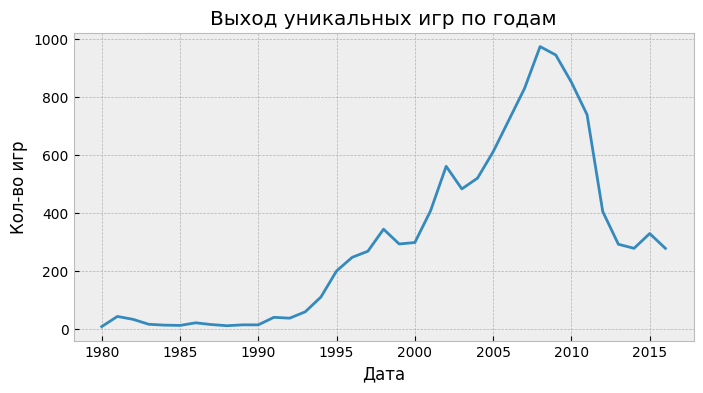

In [ ]:
games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year = pd.DataFrame({'Дата':games_per_year.index, 'Кол-во игр': games_per_year.values})
games_per_year = games_per_year.drop(games_per_year.index[0])
games_per_year

# Построение графика
plt.figure(figsize=(8, 4))
sns.lineplot(data=games_per_year, x='Дата', y='Кол-во игр')
plt.xlabel('Дата')
plt.ylabel('Кол-во игр')
plt.title('Выход уникальных игр по годам')
plt.grid(True)
plt.show()

- Самое большое кол-во игр было с 2005 по 2010 год, в этоти года игравая индустрия получила признание среди пользователей, поэтому начился достаточно большой выпуск игр, разных жанров.

#### 2) Найти топ 10 платформ с наибольшими суммарными продажами

In [ ]:
df['sum_sales'] = df['na_sales']+df['eu_sales']+ df['jp_sales']+df['other_sales']
games_platforms = df.groupby('platform')['sum_sales'].sum()
top_10_games = games_platforms.sort_values(ascending=False).head(10)
top_10_games

platform
PS2     1137.42
Wii      772.72
PS       699.36
DS       690.88
X360     574.85
PS3      525.16
PS4      255.01
GBA      243.07
GB       234.88
NES      233.59
Name: sum_sales, dtype: float64

 ### 3) Построить распределение по годам в зависимости от сумм продаж (выбрать наибольшие суммарные продажи)

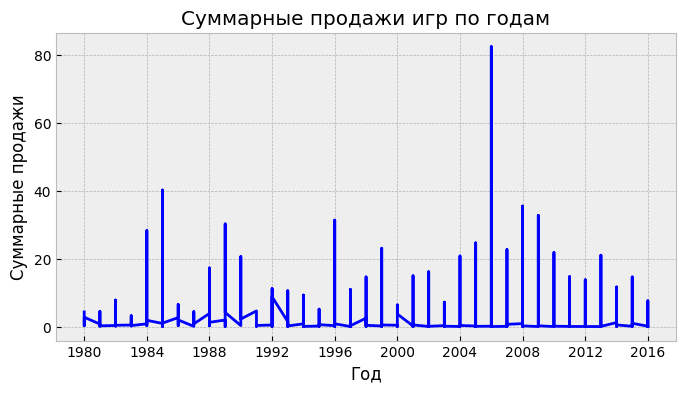

In [ ]:
sum_games_sales = pd.DataFrame({'Год': df['year_of_release'], 'Суммарные продажи': df['sum_sales']})
sum_games_sales.set_index('Год', inplace=True)
sum_games_sales = sum_games_sales.sort_index()
sum_games_sales = sum_games_sales.drop(sum_games_sales.index[0])
sum_games_sales.index = pd.to_datetime(sum_games_sales.index, format='%Y')

plt.figure(figsize=(8, 4))
plt.plot(sum_games_sales.index, sum_games_sales['Суммарные продажи'], marker='', linestyle='-', color='b')


plt.title('Суммарные продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

- Наибольшие суммарные продажи были в с 2004 по 2009 год.

#### 4) Cделать срез от 2009 года и посмотреть какие платформы актуальные( по кол-ву продаж)

In [ ]:
df_2009 = df[df['year_of_release'] >= 2009]
df_2009 = df_2009[['year_of_release', 'platform']]
df_2009 = df_2009.set_index('year_of_release')  # Применяем set_index, чтобы сделать столбец 'year_of_release' индексом
platform_counts = df_2009['platform'].value_counts().sort_values(ascending=False)
platform_counts

DS      743
PS3     571
Wii     545
PSP     519
3DS     413
X360    334
PS4     296
PSV     279
PC      262
PS2      64
WiiU     58
XOne     33
Name: platform, dtype: int64

#### 5) Выбрать акутальный период начала исследования в зависимости от новой платформы после того, как опередлились с периодом, удалить все данные до начала периода какие платформы лидируют по продажам?

In [ ]:
df_akt = df[df['year_of_release'] >= 1990]
df_akt = df_akt[['year_of_release', 'platform']]
df_akt = df_akt.set_index('year_of_release')
df_akt = df_akt['platform'].value_counts().sort_values(ascending=False)
df_akt.head(10)

PS2     1823
DS      1749
PS      1115
Wii      912
PSP      888
PS3      682
GBA      609
X360     541
PC       495
3DS      413
Name: platform, dtype: int64

#### 6) составь потрет пользователя по региону EU, самые популярные платформы (топ-5). Опиши различия в долях продаж.

In [ ]:
df_port1 = df[['year_of_release','platform','eu_sales' ]]
df_port1 = df_port1.set_index('year_of_release')
df_port1.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(15)

platform
PS2     315.04
Wii     226.58
PS      202.74
PS3     190.63
DS      162.29
X360    143.78
PS4     115.48
PC       89.76
GBA      55.67
3DS      51.73
GB       43.49
PSP      41.74
N64      36.51
XB       24.25
GC       20.40
Name: eu_sales, dtype: float64

- С 1990 года по 2016 год было замеченно, что из самых популярных платформ по сумме продаж оказалась PS2. По разнице продаж видно, что  топ - 9 отличается между собой на 20-25 д.е;

#### 7) Самые популярные жанры (топ-5). Поясните разницу

In [ ]:
df_port2 = df[['year_of_release','genre','eu_sales' ]]
df_port2 = df_port2.set_index('year_of_release')
df_port2.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5)

genre
Action     322.66
Sports     271.36
Shooter    201.18
Racing     191.30
Misc       176.13
Name: eu_sales, dtype: float64

- Максимальное кол-во потребителей устремленны на покупку жанра  "Экшен". Разница по кол-ву продаж составляет примерно 50-70 т.ед. между жанрами вниз по топу.

### Вывод
Проведя анализ данных мы заметили такие закономерности как:

- 1) Бум в гейменге начался с 1990 года и достиг своего пика с 2005 по 2010 годы по кол-ву вышедших игр;
- 2) Особую популярность за всё время по кол-ву продаж и суммарными продажами завоевала платформа PS2; Так же это имеет места в странах Европы, но в 2009 году актуальность данной платформы была утрачена и лидерство было отдано более соывременным игровым платформам;
- 3) Самым любимым игровым жанром среди потребителей, является 'экшен', 'спорт' идёт на втором месте, 'шутер' на третьем...
- 4) Пиковые продажи игр были в 2007-2008 году.

## Проверка гипотез

      Проверь гипотезы:
      Перед тем как сформулировать гипотезы глянь на разброс значений - aggfunc=['mean', 'std', 'var']
      - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

Сформулируем и проверим гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
# Создаем сводную таблицу с агрегированными значениями
# Перед тем как сформулировать гипотезы глянь на разброс значений - aggfunc=['mean', 'std', 'var']
selected_platforms = ['XOne', 'PC']
table = df.query('platform in @selected_platforms')
table = table.pivot_table(index='platform', values='user_score', aggfunc=['std', 'var','mean', 'min', 'max'])
table

,std,var,mean,min,max
,user_score,user_score,user_score,user_score,user_score
platform,,,,,
PC,1.479839,2.189922,7.319663,2.1,9.3
XOne,1.100357,1.210785,6.796154,3.0,8.3


2. C 1995 - 2000 год среднее предпочтение людей было больше направленно на игры с жанром 'action', чем на игры с жанром 'sport'.

In [ ]:
df_action_95_00 = df[(df['year_of_release']>= 1995) & (df['year_of_release'] <= 2000)]
selected_genre = ['Action', 'Sports']
table2 = df_action_95_00.query('genre in @selected_genre')
table2 = table2.pivot_table(index = 'genre', values = 'user_score',aggfunc=['std', 'var','mean', 'min', 'max'] )
table2

,std,var,mean,min,max
,user_score,user_score,user_score,user_score,user_score
genre,,,,,
Action,1.377219,1.896733,7.856000,4.3,9.4
Sports,1.236569,1.529103,7.692308,4.6,9.2


3. Критики поставили большую средную оценку играм из жанра 'Strategy', чем играм из жанра 'Fighting'

In [ ]:
df_critic = df.dropna(subset=['critic_score'])
df_critic = df_critic.dropna(subset=['critic_score'])
df_critic['critic_score'].isna().sum()
selected_critic = ['Strategy', 'Fighting']
table3 = df_critic.query('genre in @selected_critic')
table3 = table3.pivot_table(index = 'genre', values='critic_score', aggfunc=['std', 'var','mean', 'min', 'max'])
table3

,std,var,mean,min,max
,critic_score,critic_score,critic_score,critic_score,critic_score
genre,,,,,
Fighting,14.632860,214.120583,68.539623,23.0,98.0
Strategy,11.970905,143.302556,72.117647,35.0,94.0


### Гипотеза 1

Нулевой гипотезой будет гипотеза о том, что средние пользовательские рейтинги платформ одинаковые;

Альтернативной гипотезой будет гипотеза о том, что среднии пользовательские рейтинги платформ различаются";

Используем метод "Тест Стьюдента";

Критический уровень значимости зададим 0.05.

In [ ]:
xbox_one_ratings = df[df['platform'] == 'XOne']['user_score']
xbox_one_ratings.fillna(xbox_one_ratings.mean(), inplace=True)

pc_ratings = df[df['platform'] == 'PC']['user_score']
pc_ratings.fillna(xbox_one_ratings.mean(), inplace=True)

#Если параметрика:
if xbox_one_ratings.mean() > 0 and pc_ratings.mean() > 0:
  t_stat, p_value = ttest_ind(xbox_one_ratings, pc_ratings)
  print('Результаты t-теста:')
  print('t-статистика', t_stat)
  print('p-значение:', p_value)
else:
#Если непараметрика:
  stat, p_value = mannwhitneyu(xbox_one_ratings, pc_ratings)
  print("Результаты теста Манна-Уитни:")
  print('Статистика', stat)
  print('p-value:', p_value)

alpha = 0.05
if p_value < alpha:
  print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различаются')
else:
  print('Не отвергаем нулевую гипотезу. Нет оснований считать средние рейтинги различными')


Результаты t-теста:
t-статистика -1.654818474897903
p-значение: 0.09855333926274583
Не отвергаем нулевую гипотезу. Нет оснований считать средние рейтинги различными


<ipython-input-74-fc672736f173>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xbox_one_ratings.fillna(xbox_one_ratings.mean(), inplace=True)
<ipython-input-74-fc672736f173>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_ratings.fillna(xbox_one_ratings.mean(), inplace=True)


Вывод: Коэффициент P-value говорит нам о том, что вероятность случайного совпадения вполне обоснована, т.к нет оснований отвергнуть гипотезу. Соответсвенно совпадения в средних рейтингах выбранных платформ не случайны.

### Гипотеза 2

Нулевой гипотезой будет гипотеза о том, что c 1995 - 2000 год среднее предпочтение людей было больше направленно на игры с жанром 'action', чем на игры с жанром 'sport'.

Альтернативной гипотезой будет гипотеза о том, что c 1995 - 2000 год среднее предпочтение людей было больше направленно на игры с жанром 'sport', чем на игры с жанром 'action'.;

Используем метод "Тест Стьюдента";

Критический уровень значимости зададим 0.05.

In [ ]:
action = df[df['genre'] == 'Action']['user_score']
action.fillna(action.mean(), inplace=True)

sport = df[df['genre'] == 'Sports']['user_score']
sport.fillna(sport.mean(), inplace=True)

#Если параметрика:
if action.mean() > 0 and sport.mean() > 0:
  t_stat, p_value = ttest_ind(action, sport)
  print('Результаты t-теста:')
  print('t-статистика', t_stat)
  print('p-значение:', p_value)
else:
#Если непараметрика:
  stat, p_value = mannwhitneyu(action, sport)
  print("Результаты теста Манна-Уитни:")
  print('Статистика', stat)
  print('p-value:', p_value)

alpha = 0.05
if p_value < alpha:
  print('Отвергаем нулевую гипотезу. Среднее предпочтение людей больше направленно на игры с жанром \'sport\' c 1995-2000 год.')
else:
  print('Не отвергаем нулевую гипотезу. Среднее предпочтение людей больше направленно на игры с жанром \'action\' c 1995-2000 год. ')


Результаты t-теста:
t-статистика 1.8110953212138905
p-значение: 0.07021652157162678
Не отвергаем нулевую гипотезу. Среднее предпочтение людей больше направленно на игры с жанром 'action' c 1995-2000 год. 


<ipython-input-76-11bb0e0c7763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action.fillna(action.mean(), inplace=True)
<ipython-input-76-11bb0e0c7763>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sport.fillna(sport.mean(), inplace=True)


### Гипотеза 3

Нулевой гипотезой будет гипотеза о том, критики поставили большую средную оценку играм из жанра 'Strategy', чем играм из жанра 'Fighting'

Альтернативной гипотезой будет гипотеза о том, что критики поставили большую средную оценку играм из жанра 'Fighting', чем играм из жанра 'Strategy';

Используем метод "Тест Стьюдента";

Критический уровень значимости зададим 0.05.

In [ ]:
Strategy = df_critic[df_critic['genre'] == 'Strategy']['critic_score']
Fighting = df_critic[df_critic['genre'] == 'Fighting']['critic_score']

#Если параметрика:
if Strategy.var() > 0 and Fighting.var() > 0:
  t_stat, p_value = ttest_ind(Strategy, Fighting)
  print('Результаты t-теста:')
  print('t-статистика', t_stat)
  print('p-значение:', p_value)
else:
#Если непараметрика:
  t_stat, p_value = mannwhitneyu(Strategy, Fighting)
  print("Результаты теста Манна-Уитни:")
  print('Статистика', stat)
  print('p-value:', p_value)

alpha = 0.05
if p_value < alpha:
  print('Отвергаем нулевую гипотезу.Критики поставили большую средную оценку играм из жанра \'Fighting\', чем играм из жанра \'Strategy\'.')
else:
  print('Не отвергаем нулевую гипотезу. Критики поставили большую средную оценку играм из жанра \'Strategy\', чем играм из жанра \'Fighting\'. ')

Результаты t-теста:
t-статистика 2.9811786087452403
p-значение: 0.00301107964031762
Отвергаем нулевую гипотезу.Критики поставили большую средную оценку играм из жанра 'Fighting', чем играм из жанра 'Strategy'.


### Общий вывод

Проводя исследования по нашим поставленным выборкам, мы пришли к тому что :
1. Средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми;
2. В 2005 по 2010 годы большее предпочтение людей было направленно в сторону жанра 'Action', чем на жанр 'Sports'
3. Критики более предпочтительны к жанру 'Fighting', чем к жанру 'Strategy'.

## Вывод проекта


В ходе выполнения исследования мы подготовили данные, нашли и исправили ошибки в данных связанные со сдвигами, обработали типы и пропуски. Далее проанализировали развитие игровой индустрии по годам, исследовали суммарные кол-ва продаж, а так же продажи в отдельных регионах и топ лидирующих игровых жанров. После проверили пару своих гипотиз, отвергли только одну из имеющихся трёх. В целом анализ получился содержателен и может быть использован для оценки индустрии "гейминга" по всему миру.